In [54]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap 
%matplotlib inline


In [55]:
sepsis_df = pd.read_excel("/Users/anirudh/Desktop/Em_Pheno_MAPS/Sepsis_Mean.xlsx")
sepsis_df

,HR-mean,O2Sat-mean,Temp-mean,SBP-mean,MAP-mean,DBP-mean,Resp-mean,EtCO2-mean,HCO3-mean,FiO2-mean,...,Bilirubin_total-mean,TroponinI-mean,Hct-mean,Hgb-mean,PTT-mean,WBC-mean,Fibrinogen-mean,Platelets-mean,SOFA-mean,SIRS-mean
0,88.1925,96.7725,36.8825,121.779,84.41975,67.3225,4944.24,7.4425,23.2175,0.433,...,1.491,8.660275,33.5475,10.35325,31.6425,102.6375,327.2475,149.62225,3.31325,2.45675


In [56]:
#sepsis_df = sepsis_df.drop(sepsis_df.columns[0], axis=1)

In [57]:
sepsis_df
pheno = sepsis_df.columns
print(pheno)

Index(['HR-mean', 'O2Sat-mean', 'Temp-mean', 'SBP-mean', 'MAP-mean',
       'DBP-mean', 'Resp-mean', 'EtCO2-mean', 'HCO3-mean', 'FiO2-mean',
       'pH-mean', 'PaCO2-mean', 'SaO2-mean', 'Chloride-mean',
       'Creatinine-mean', 'Bilirubin_direct-mean', 'Glucose-mean',
       'Lactate-mean', 'Magnesium-mean', 'Phosphate-mean', 'Potassium-mean',
       'Bilirubin_total-mean', 'TroponinI-mean', 'Hct-mean', 'Hgb-mean',
       'PTT-mean', 'WBC-mean', 'Fibrinogen-mean', 'Platelets-mean',
       'SOFA-mean', 'SIRS-mean'],
      dtype='object')


In [58]:
sepsis_df = sepsis_df.T 
print(sepsis_df.shape)

(31, 1)


In [59]:
n_components = 2 
umap_reducer = umap.UMAP(n_neighbors=3, n_components=n_components, min_dist=0.1, random_state=42)

In [60]:
umap_result = umap_reducer.fit_transform(sepsis_df)
# umap_result' contains the reduced-dimensional representation of your data

/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [61]:
print(umap_result)
print(len(umap_result))

[[ 7.488055   7.257686 ]
 [ 6.2055855  7.471139 ]
 [ 2.9116235 21.872543 ]
 [14.345625   5.147293 ]
 [ 7.216168   7.476396 ]
 [ 7.822598   7.5509086]
 [14.658318   5.8414474]
 [ 2.2053688  6.830959 ]
 [ 3.5732825 21.21206  ]
 [16.13477   -6.552047 ]
 [ 2.3588254  6.6802053]
 [ 3.0335104 21.750399 ]
 [ 6.600029   7.365545 ]
 [ 6.1565466  7.741638 ]
 [14.286675  -6.043275 ]
 [16.00454   -6.436547 ]
 [14.591278   5.3493996]
 [15.104539  -6.1188273]
 [15.579479  -6.2758737]
 [13.554274  -6.207328 ]
 [13.302348  -6.4483037]
 [16.144365  -6.6208973]
 [ 2.5451455  6.4926357]
 [ 3.3180592 21.467316 ]
 [ 2.7097504  6.329719 ]
 [ 3.4415243 21.343992 ]
 [ 5.9722404  7.8871713]
 [14.834733   5.4966063]
 [14.4890375  5.6530538]
 [13.755233  -6.1307   ]
 [14.740258  -6.090187 ]]
31


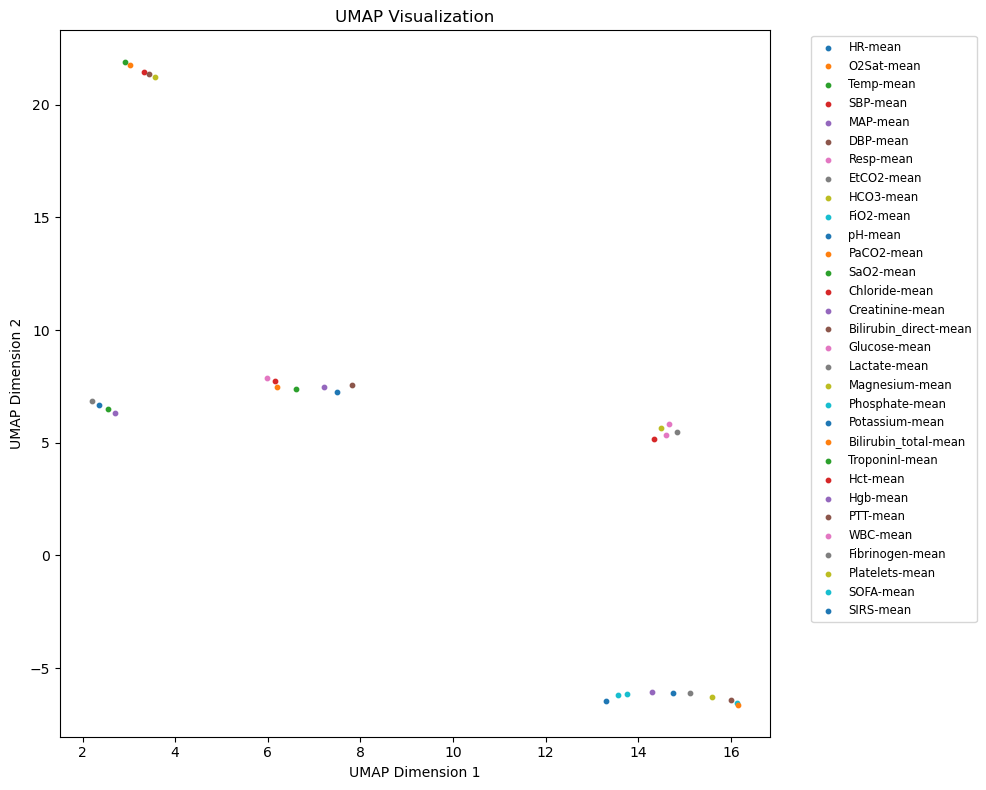

In [62]:
import matplotlib.pyplot as plt

# Assuming umap_result is a 2D array with shape (31, 2)
# If umap_result is a DataFrame, you can convert it to a NumPy array using umap_result.to_numpy()

# Create a list of labels for each of the 31 points
labels = ['HR-mean', 'O2Sat-mean', 'Temp-mean', 'SBP-mean', 'MAP-mean',
       'DBP-mean', 'Resp-mean', 'EtCO2-mean', 'HCO3-mean', 'FiO2-mean',
       'pH-mean', 'PaCO2-mean', 'SaO2-mean', 'Chloride-mean',
       'Creatinine-mean', 'Bilirubin_direct-mean', 'Glucose-mean',
       'Lactate-mean', 'Magnesium-mean', 'Phosphate-mean', 'Potassium-mean',
       'Bilirubin_total-mean', 'TroponinI-mean', 'Hct-mean', 'Hgb-mean',
       'PTT-mean', 'WBC-mean', 'Fibrinogen-mean', 'Platelets-mean',
       'SOFA-mean', 'SIRS-mean']

# Make sure the length of your umap_result matches the number of labels
if len(umap_result) != len(labels):
    raise ValueError("Number of data points and number of labels must match.")

# Create a scatter plot with different labels for each point
plt.figure(figsize=(10, 8))
for i in range(len(umap_result)):
    plt.scatter(umap_result[i, 0], umap_result[i, 1], s=10, label=labels[i])

# Move the legend to the side and set the font size
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.tight_layout()  # Ensures the legend does not overlap with the plot
plt.show()


In [63]:
pheno

Index(['HR-mean', 'O2Sat-mean', 'Temp-mean', 'SBP-mean', 'MAP-mean',
       'DBP-mean', 'Resp-mean', 'EtCO2-mean', 'HCO3-mean', 'FiO2-mean',
       'pH-mean', 'PaCO2-mean', 'SaO2-mean', 'Chloride-mean',
       'Creatinine-mean', 'Bilirubin_direct-mean', 'Glucose-mean',
       'Lactate-mean', 'Magnesium-mean', 'Phosphate-mean', 'Potassium-mean',
       'Bilirubin_total-mean', 'TroponinI-mean', 'Hct-mean', 'Hgb-mean',
       'PTT-mean', 'WBC-mean', 'Fibrinogen-mean', 'Platelets-mean',
       'SOFA-mean', 'SIRS-mean'],
      dtype='object')

### Scaled Data 

In [64]:
sepsis_df_scaled = StandardScaler().fit_transform(sepsis_df)

In [65]:
n_components = 2 
umap_reducer = umap.UMAP(n_neighbors=3, n_components=n_components, min_dist=0.1, random_state=42)
umap_result = umap_reducer.fit_transform(sepsis_df_scaled)

/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [66]:
print(umap_result)
print(len(umap_result))

[[ 9.722037   11.045146  ]
 [10.402491   10.237548  ]
 [-0.45972946  6.799503  ]
 [ 9.41594     8.719112  ]
 [ 9.709661   11.348752  ]
 [ 9.204674   11.30172   ]
 [ 9.745045    7.8200397 ]
 [ 1.8567419  -7.075287  ]
 [-0.07296206  7.187432  ]
 [ 9.710634   -4.71399   ]
 [ 1.6831616  -7.2487683 ]
 [-0.67525095  6.5828314 ]
 [10.235528   10.609895  ]
 [10.533153   10.072273  ]
 [ 8.017596    1.0824821 ]
 [10.018127   -4.4398217 ]
 [ 9.3383465   8.323386  ]
 [ 9.965203   -3.5214138 ]
 [10.003736   -3.9628694 ]
 [ 7.808918    1.8396068 ]
 [ 7.964402    1.9612186 ]
 [ 9.863569   -4.4532385 ]
 [ 2.1054623  -6.8266354 ]
 [-0.32484642  6.935132  ]
 [ 2.2015479  -6.730565  ]
 [-0.20581834  7.054659  ]
 [10.306768    9.822529  ]
 [ 9.451842    8.000124  ]
 [ 9.5988035   8.198226  ]
 [ 7.8341722   1.5333222 ]
 [ 8.272413    0.7789805 ]]
31


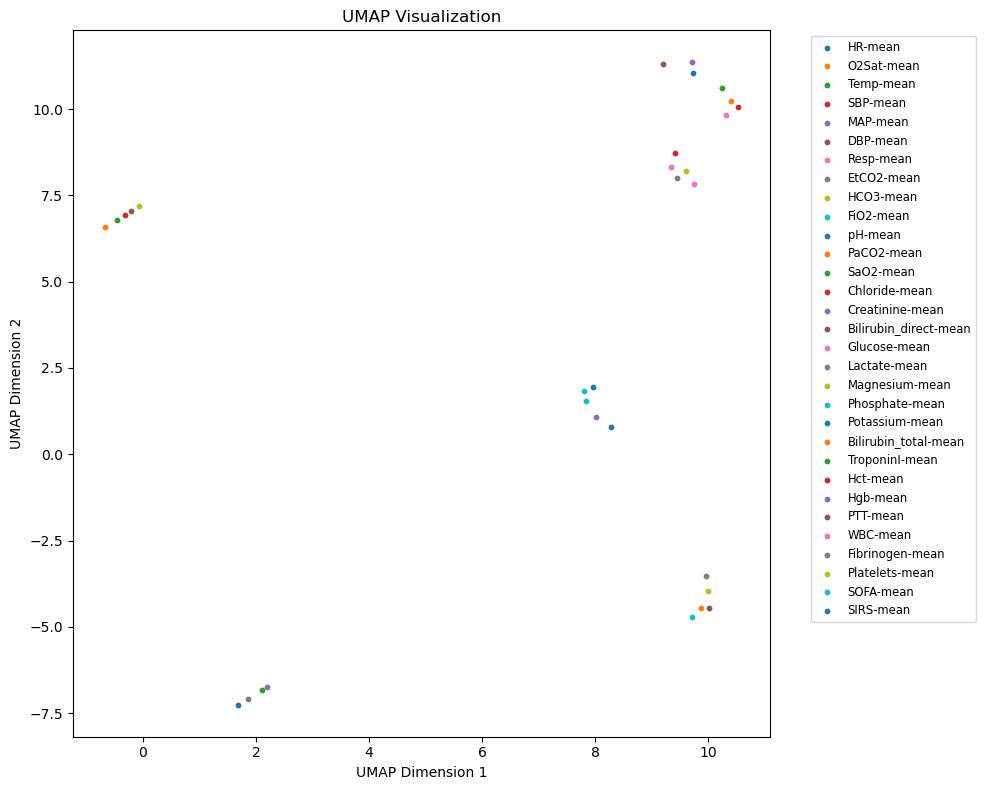

In [67]:
import matplotlib.pyplot as plt

# Assuming umap_result is a 2D array with shape (31, 2)
# If umap_result is a DataFrame, you can convert it to a NumPy array using umap_result.to_numpy()

# Create a list of labels for each of the 31 points
labels = ['HR-mean', 'O2Sat-mean', 'Temp-mean', 'SBP-mean', 'MAP-mean',
       'DBP-mean', 'Resp-mean', 'EtCO2-mean', 'HCO3-mean', 'FiO2-mean',
       'pH-mean', 'PaCO2-mean', 'SaO2-mean', 'Chloride-mean',
       'Creatinine-mean', 'Bilirubin_direct-mean', 'Glucose-mean',
       'Lactate-mean', 'Magnesium-mean', 'Phosphate-mean', 'Potassium-mean',
       'Bilirubin_total-mean', 'TroponinI-mean', 'Hct-mean', 'Hgb-mean',
       'PTT-mean', 'WBC-mean', 'Fibrinogen-mean', 'Platelets-mean',
       'SOFA-mean', 'SIRS-mean']

# Make sure the length of your umap_result matches the number of labels
if len(umap_result) != len(labels):
    raise ValueError("Number of data points and number of labels must match.")

# Create a scatter plot with different labels for each point
plt.figure(figsize=(10, 8))
for i in range(len(umap_result)):
    plt.scatter(umap_result[i, 0], umap_result[i, 1], s=10, label=labels[i])

# Move the legend to the side and set the font size
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.tight_layout()  # Ensures the legend does not overlap with the plot
plt.show()
